In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/college_datav3.csv')
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


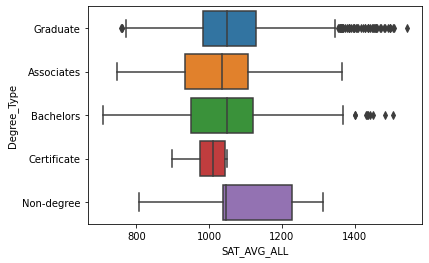

In [4]:
sns.boxplot(data=df, x='SAT_AVG_ALL', y='Degree_Type')
plt.show()

## FacetGrid

In [5]:
df['Degree_Type'].unique()

array(['Graduate', 'Associates', 'Bachelors', 'Certificate', 'Non-degree'],
      dtype=object)

c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


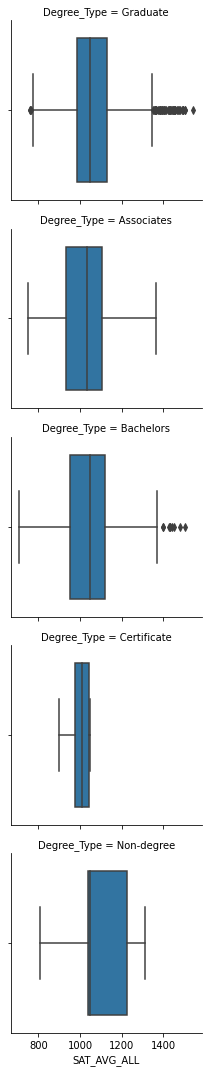

In [7]:
# tạo FacetGrid theo dòng
grid = sns.FacetGrid(data=df, row='Degree_Type')
grid.map(sns.boxplot, 'SAT_AVG_ALL')
plt.show()

c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


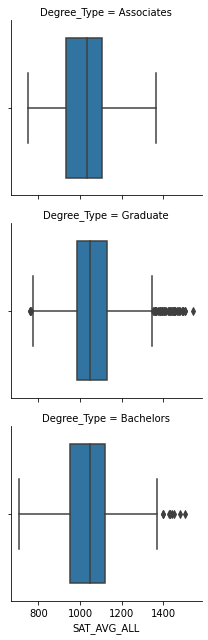

In [8]:
# tạo FacetGrid theo dòng, chỉ hiển thị các dòng theo thứ tự: 'Associates', 'Graduate', 'Bachelors'
grid = sns.FacetGrid(data=df, row='Degree_Type', row_order= ['Associates', 'Graduate', 'Bachelors'])
grid.map(sns.boxplot, 'SAT_AVG_ALL')
plt.show()

c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


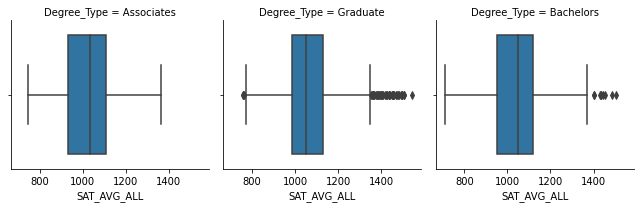

In [9]:
# tạo FacetGrid theo cột, chỉ hiển thị các cột theo thứ tự: 'Associates', 'Graduate', 'Bachelors'
grid = sns.FacetGrid(data=df, col='Degree_Type', col_order= ['Associates', 'Graduate', 'Bachelors'])
grid.map(sns.boxplot, 'SAT_AVG_ALL')
plt.show()

c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


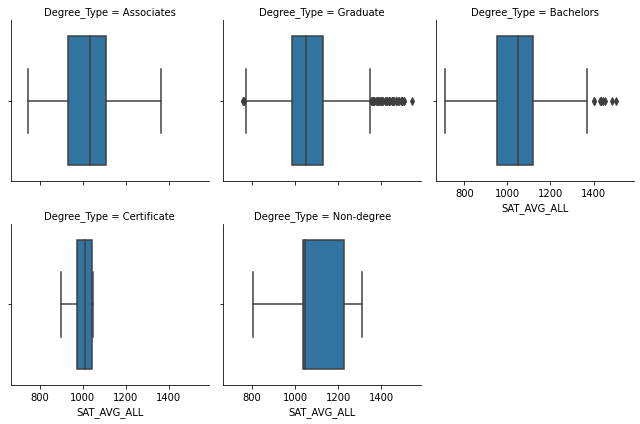

In [11]:
# tạo FacetGrid theo cột, 
# các cột theo thứ tự: 'Associates', 'Graduate', 'Bachelors', 'Certificate', 'Non-degree'
# chỉ hiển thị 3 cột trên 1 dòng
grid = sns.FacetGrid(data=df, col='Degree_Type', 
                     col_order= ['Associates', 'Graduate', 'Bachelors', 'Certificate', 'Non-degree'],
                     col_wrap=3)
grid.map(sns.boxplot, 'SAT_AVG_ALL')
plt.show()

## catplot

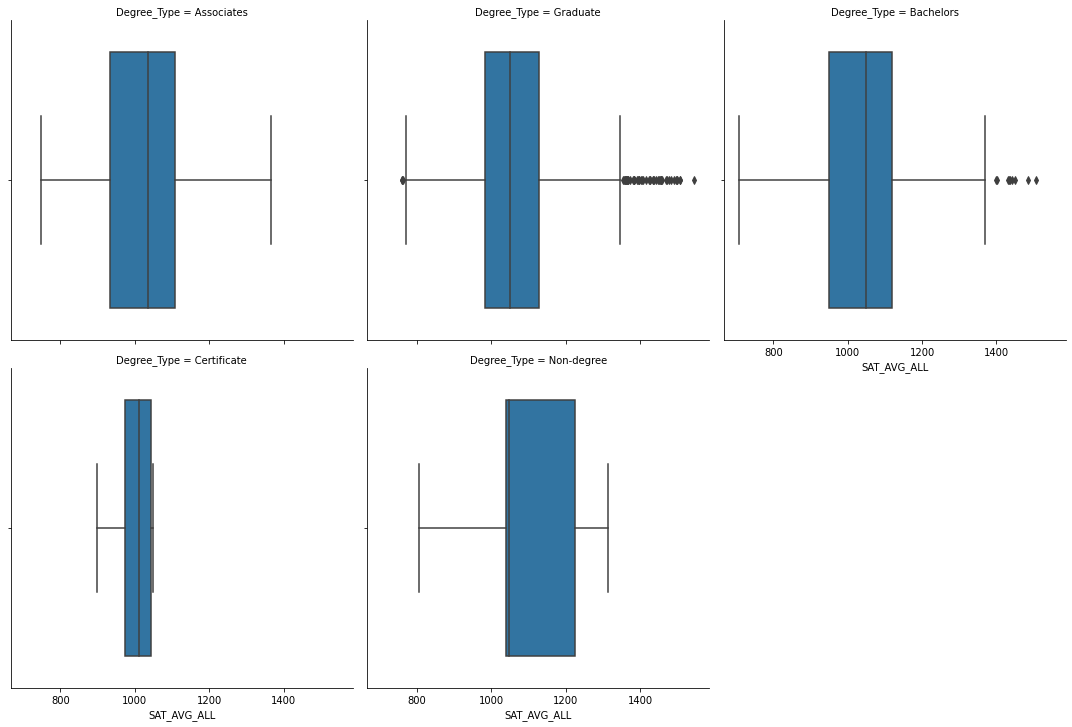

In [13]:
# kind: "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count"
# default: kind='strip'
sns.catplot(data=df, x='SAT_AVG_ALL', col='Degree_Type', kind='box',
            col_order= ['Associates', 'Graduate', 'Bachelors', 'Certificate', 'Non-degree'],
            col_wrap=3)
plt.show()

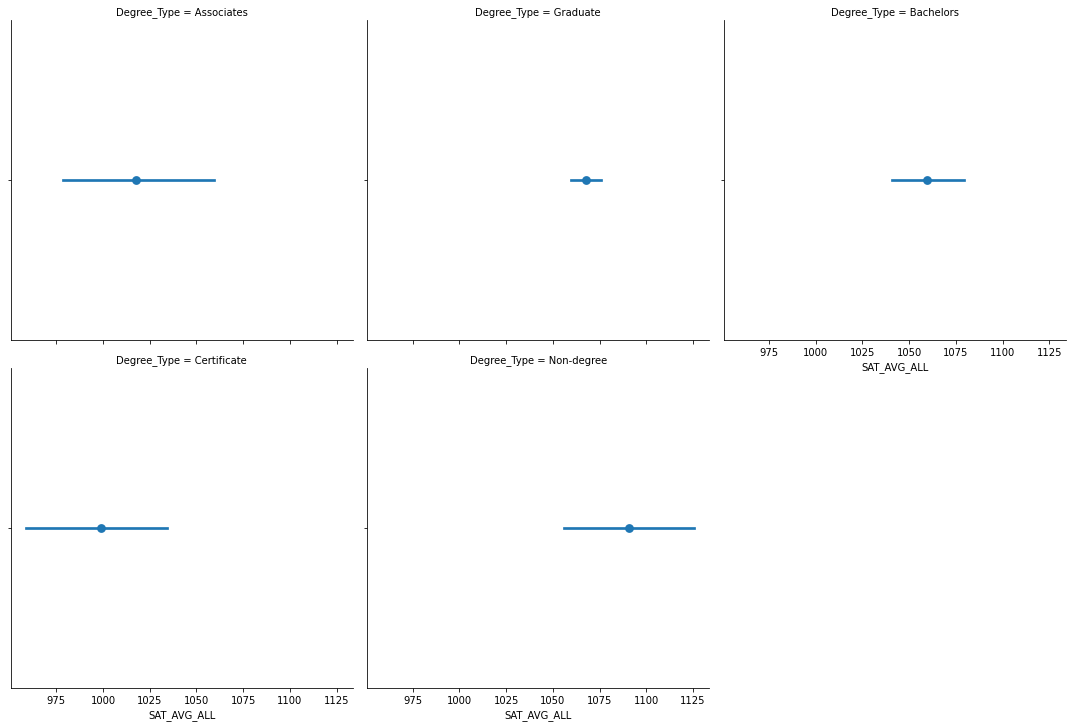

In [14]:
# kind: "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count"
# default: kind='strip'
sns.catplot(data=df, x='SAT_AVG_ALL', col='Degree_Type', kind='point',
            col_order= ['Associates', 'Graduate', 'Bachelors', 'Certificate', 'Non-degree'],
            col_wrap=3)
plt.show()

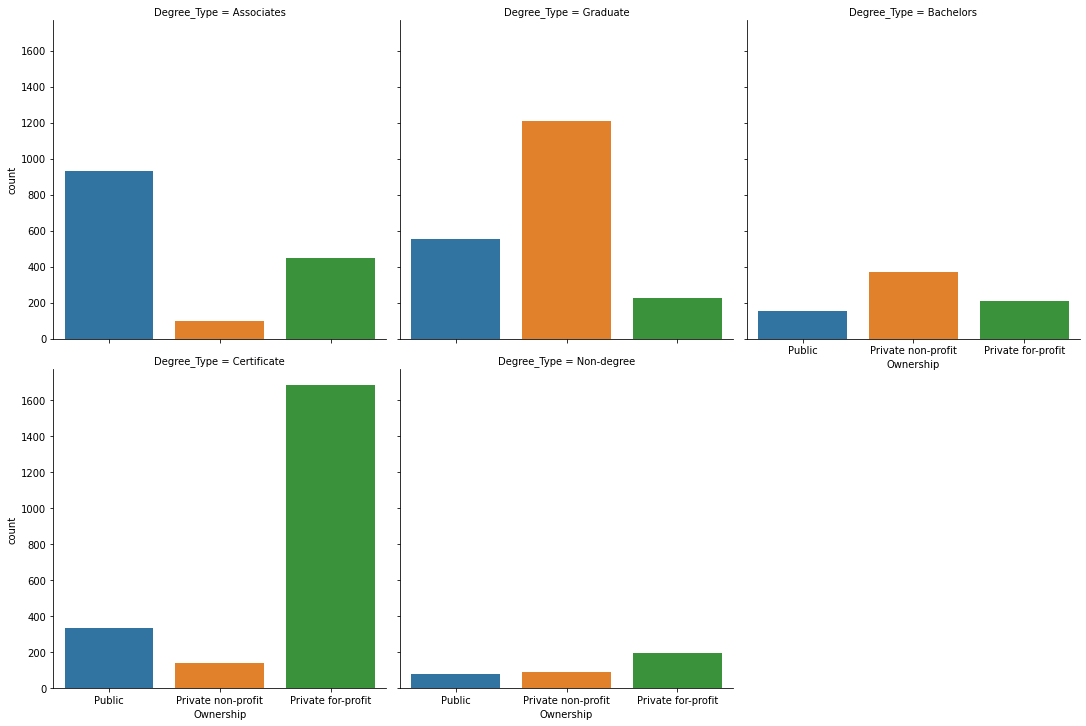

In [17]:
# kind: "strip", "swarm", "box", "violin", "boxen", "point", "bar", or "count"
# default: kind='strip'
sns.catplot(data=df, x='Ownership', col='Degree_Type', kind='count',
            col_order= ['Associates', 'Graduate', 'Bachelors', 'Certificate', 'Non-degree'],
            col_wrap=3)
plt.show()

## FacetGrid cho scatter/regression

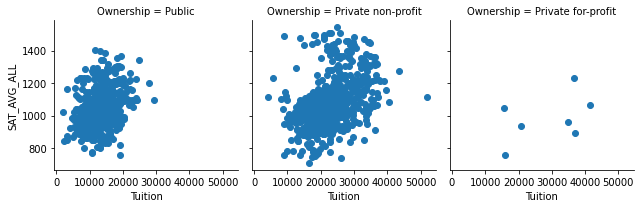

In [19]:
grid = sns.FacetGrid(data=df, col='Ownership')
grid.map(plt.scatter, 'Tuition', 'SAT_AVG_ALL')
plt.show()

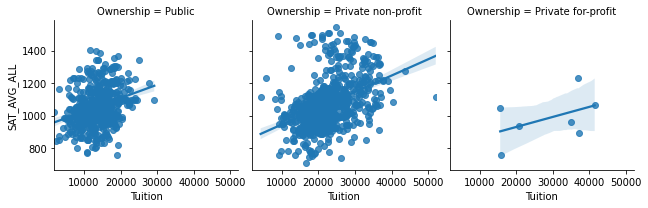

In [20]:
grid = sns.FacetGrid(data=df, col='Ownership')
grid.map(sns.regplot, 'Tuition', 'SAT_AVG_ALL')
plt.show()

## lmplot 

### (thay thế cho FacetGrid  scatter/regression)

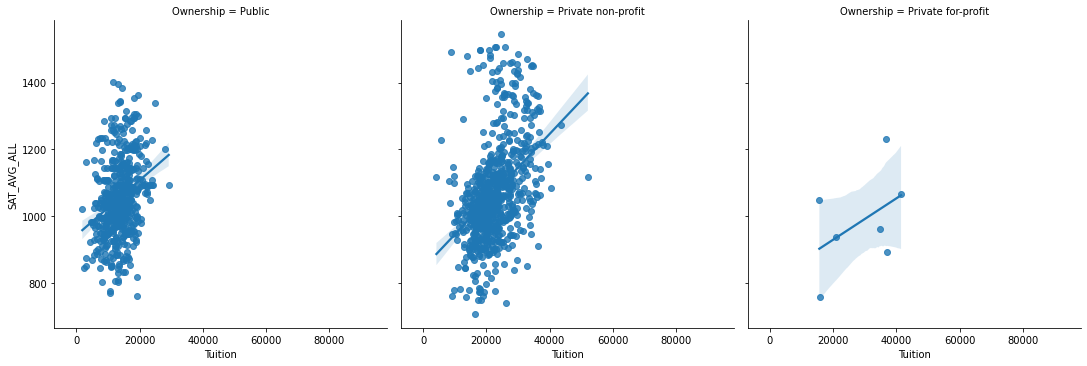

In [21]:
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL', col='Ownership')
plt.show()

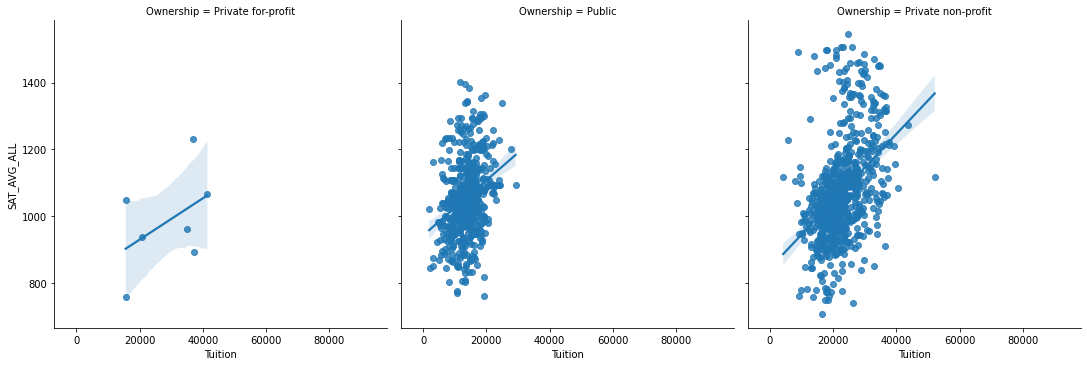

In [22]:
# thay đổi thứ tự các cột
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL', col='Ownership',
          col_order=['Private for-profit', 'Public', 'Private non-profit'])
plt.show()

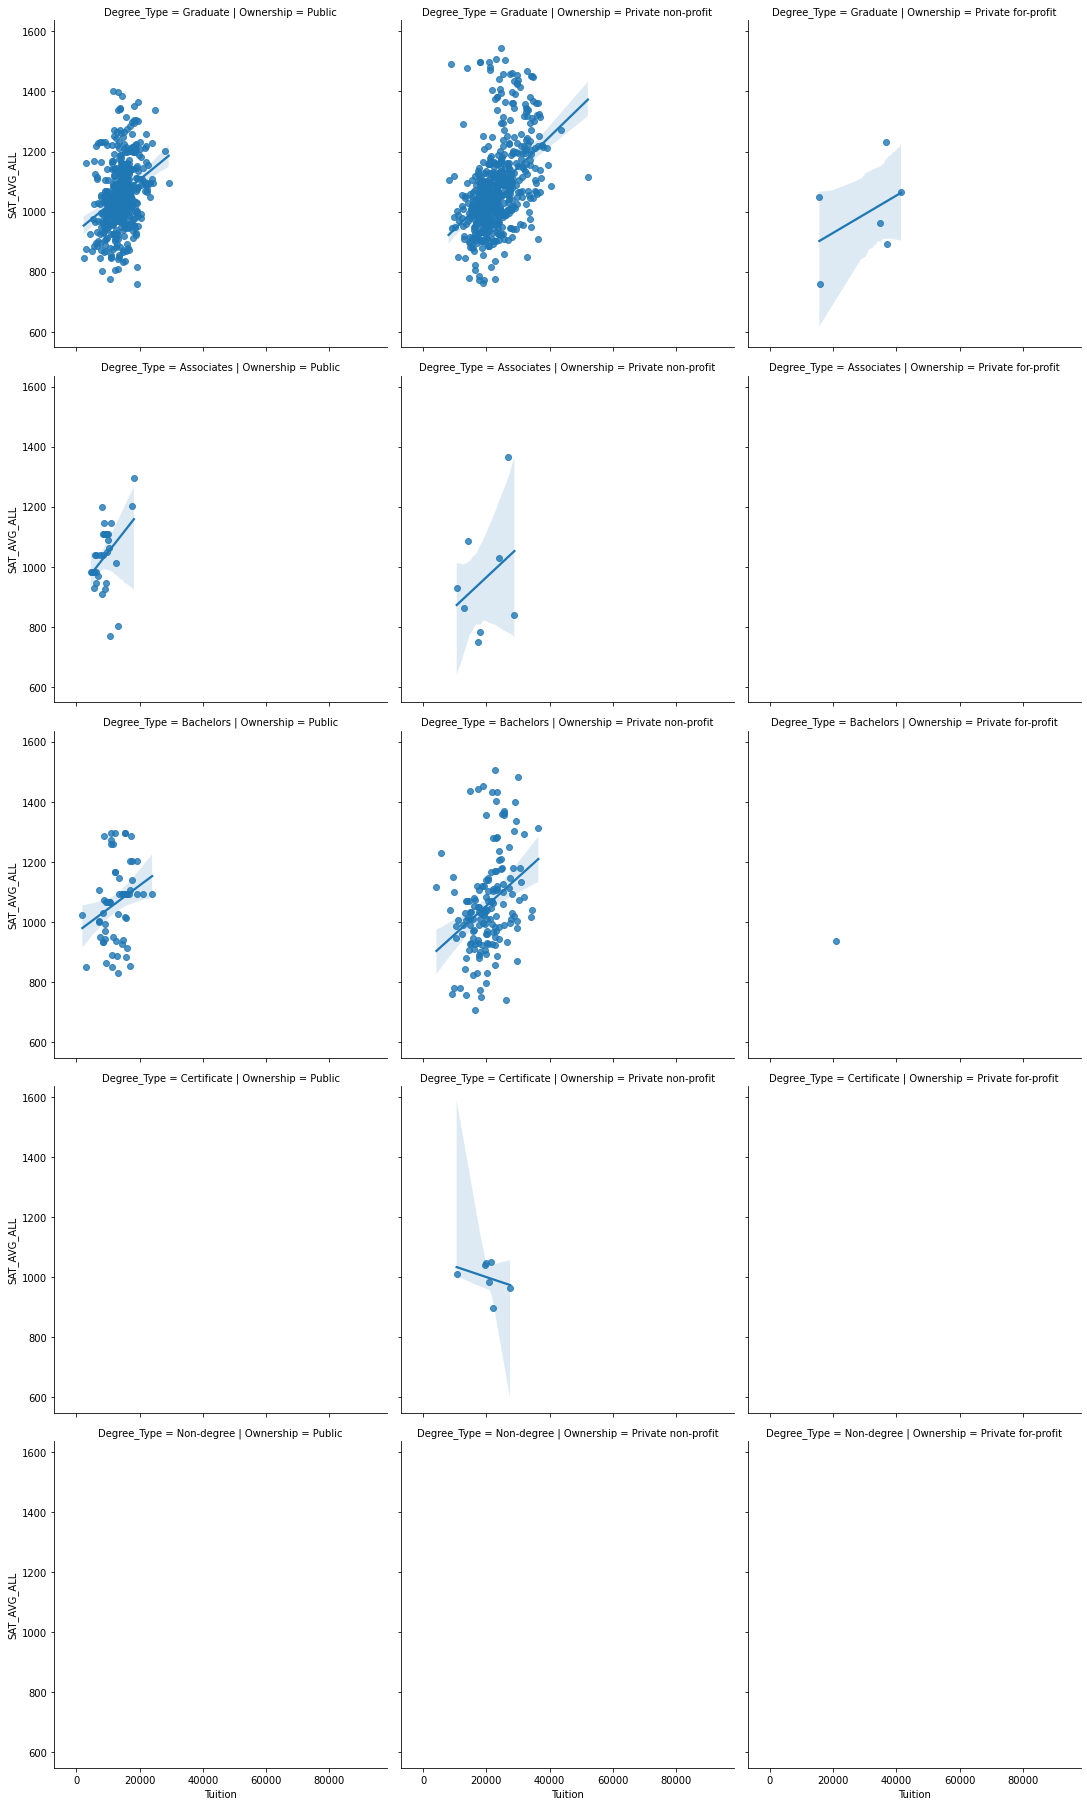

In [23]:
# Hiển thị mối tương quan giữa Tuition và SAT_AVG_ALL theo Ownership và Degree_Type
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL', col='Ownership', row='Degree_Type')
plt.show()

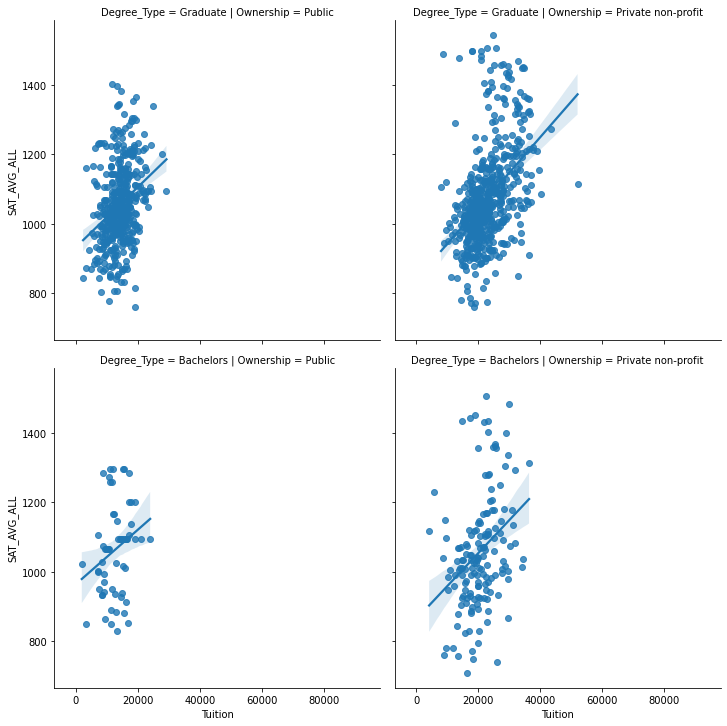

In [24]:
# Hiển thị mối tương quan giữa Tuition và SAT_AVG_ALL theo Ownership và Degree_Type
# trong đó Degree_Type chỉ hiển thị 'Graduate', 'Bachelors'
# Ownership chỉ hiển thị 'Public', 'Private non-profit'
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL', 
           col='Ownership', col_order=['Public', 'Private non-profit'], 
           row='Degree_Type', row_order=['Graduate', 'Bachelors'])
plt.show()

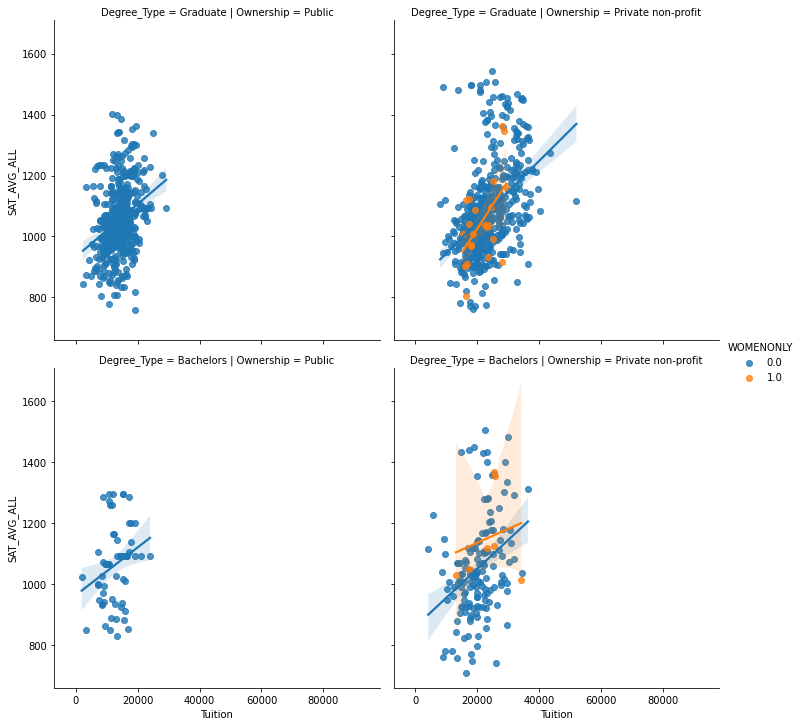

In [25]:
# Hiển thị mối tương quan giữa Tuition và SAT_AVG_ALL theo Ownership và Degree_Type
# phân nhóm theo WOMENONLY
# trong đó Degree_Type chỉ hiển thị 'Graduate', 'Bachelors'
# Ownership chỉ hiển thị 'Public', 'Private non-profit'
sns.lmplot(data=df, x='Tuition', y='SAT_AVG_ALL', hue='WOMENONLY', 
           col='Ownership', col_order=['Public', 'Private non-profit'], 
           row='Degree_Type', row_order=['Graduate', 'Bachelors'])
plt.show()

## PairGrid

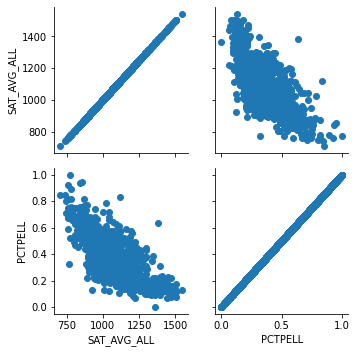

In [26]:
# xem xét mối tương quan giữa 2 cột: SAT_AVG_ALL, PCTPELL
grid = sns.PairGrid(data=df, vars=['SAT_AVG_ALL', 'PCTPELL'])
grid.map(plt.scatter)
plt.show()

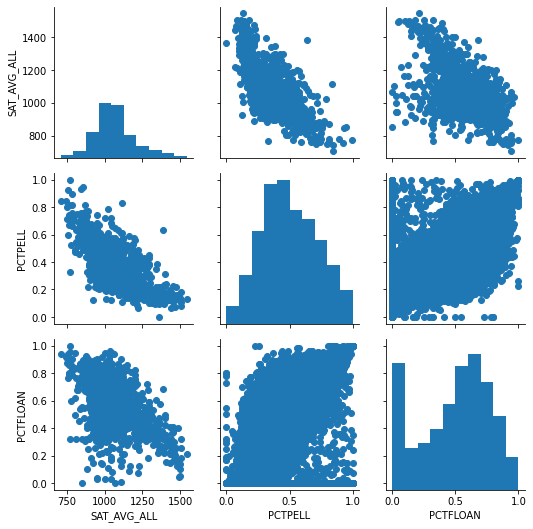

In [28]:
# tùy chỉnh loại biểu đồ trên đường chéo và các ô còn lại
# xem xét mối tương quan giữa 2 cột: SAT_AVG_ALL, PCTPELL, PCTFLOAN
grid = sns.PairGrid(data=df, vars=['SAT_AVG_ALL', 'PCTPELL', 'PCTFLOAN'])
grid.map_diag(plt.hist)
grid.map_offdiag(plt.scatter)
plt.show()

## pairplot

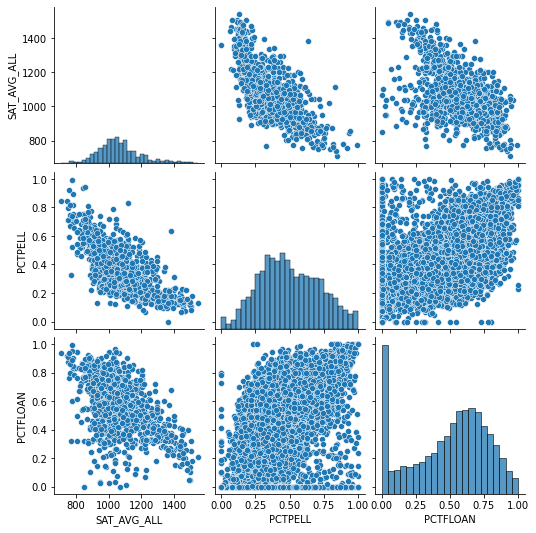

In [29]:
# xem xét mối tương quan giữa 2 cột: SAT_AVG_ALL, PCTPELL, PCTFLOAN
# kind: 'scatter', 'kde', 'hist', 'reg'
# default kind='scatter'
sns.pairplot(data=df, vars=['SAT_AVG_ALL', 'PCTPELL', 'PCTFLOAN'])
plt.show()

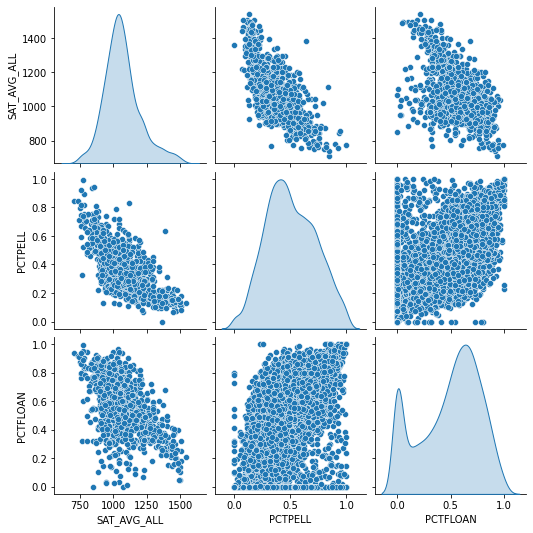

In [35]:
# xem xét mối tương quan giữa 2 cột: SAT_AVG_ALL, PCTPELL, PCTFLOAN
# kind: 'scatter', 'kde', 'hist', 'reg'
# default kind='scatter'
#diag_kind : {'auto', 'hist', 'kde', None}
sns.pairplot(data=df, vars=['SAT_AVG_ALL', 'PCTPELL', 'PCTFLOAN'], kind='scatter', diag_kind='kde')
plt.show()

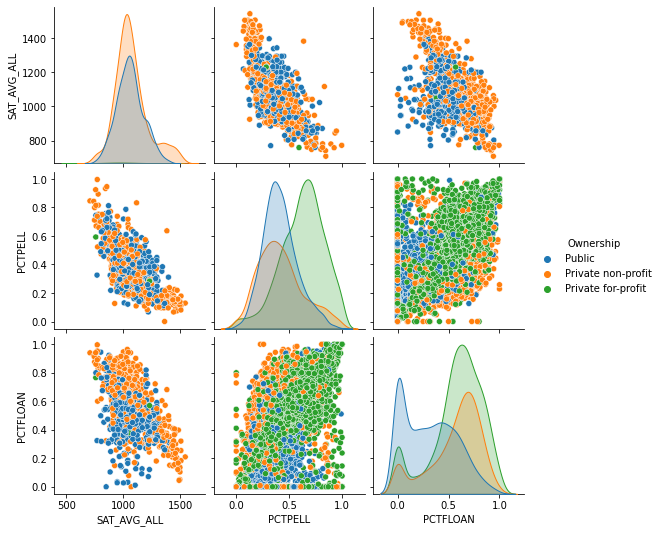

In [40]:
# xem xét mối tương quan giữa 2 cột: SAT_AVG_ALL, PCTPELL, PCTFLOAN
# phân nhóm dựa trên màu sắc theo Ownership
# kind: 'scatter', 'kde', 'hist', 'reg'
# default kind='scatter'
#diag_kind : {'auto', 'hist', 'kde', None}
sns.pairplot(data=df, vars=['SAT_AVG_ALL', 'PCTPELL', 'PCTFLOAN'], kind='scatter', 
            hue='Ownership')
plt.show()

## JointGrid

In [42]:
import warnings
warnings.filterwarnings('ignore')

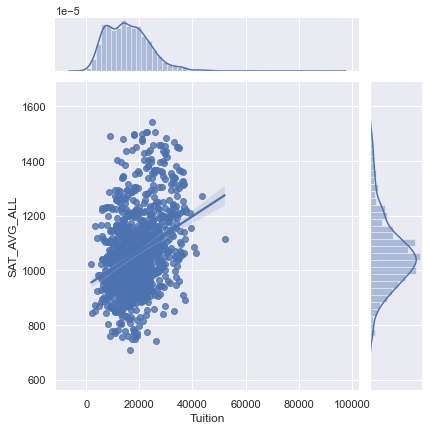

In [44]:
sns.set()
grid = sns.JointGrid(data=df, x='Tuition', y='SAT_AVG_ALL')
# chỉ định loại biểu đồ
grid.plot(sns.regplot, sns.distplot)
plt.show()

## jointplot

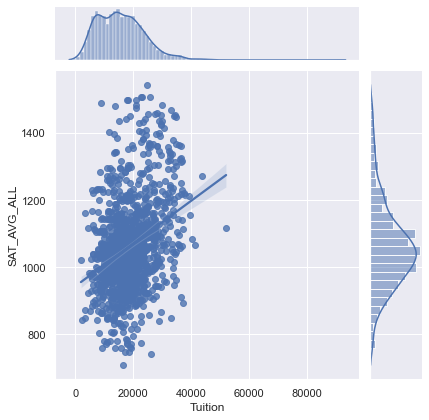

In [46]:
#kind: "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" ,
# default kind='scatter'
sns.jointplot(data=df, x='Tuition', y='SAT_AVG_ALL', kind='reg')
plt.show()

## plt.scatter vs sns.scatterplot

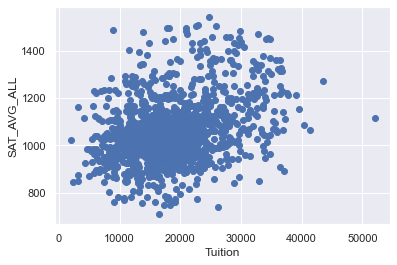

In [48]:
# xem xét mối quan hệ giữa SAT_AVG_ALL và Tuition
plt.scatter(df['Tuition'], df['SAT_AVG_ALL'])
plt.ylabel('SAT_AVG_ALL')
plt.xlabel('Tuition')
plt.show()

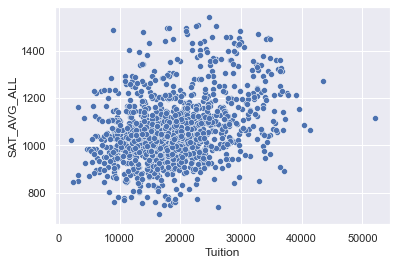

In [49]:
# xem xét mối quan hệ giữa SAT_AVG_ALL và Tuition
sns.scatterplot(df['Tuition'], df['SAT_AVG_ALL'])
plt.show()

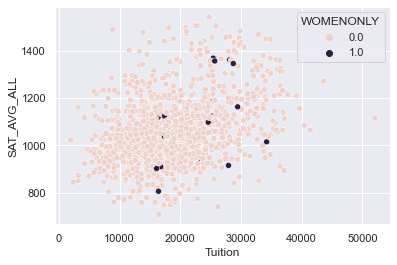

In [51]:
# xem xét mối quan hệ giữa SAT_AVG_ALL và Tuition
# phân nhóm dựa vào màu sắc theo WOMENONLY
sns.scatterplot(df['Tuition'], df['SAT_AVG_ALL'], hue=df['WOMENONLY'])
plt.show()

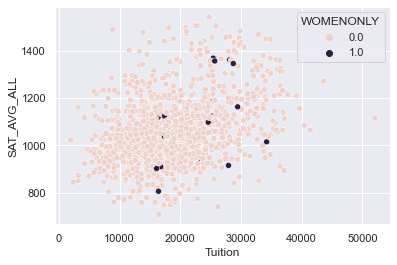

In [52]:
# xem xét mối quan hệ giữa SAT_AVG_ALL và Tuition
# phân nhóm dựa vào màu sắc theo WOMENONLY
sns.scatterplot(data=df, x='Tuition', y='SAT_AVG_ALL', hue='WOMENONLY')
plt.show()